In [1]:
from DiabetesModels import *

# Parameters for simulation
environment = read_env(ndim=2)

# Setup simulation from env dict
simulation = Simulation(environment._asdict())
# Get idea of paars to change
environment

# Turn notebook into script
# !jupyter nbconvert --to script config_template.ipynb


env(path='debug/', maxPatient=1000, patientNr=1001, path_to_simulations='simulations/', nMeals=200, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5, target=5, patient_filter=True)

In [2]:
!jupyter nbconvert --to script run_doctor_2d.ipynb
!mv run_doctor_2d.py simulations/

[NbConvertApp] Converting notebook run_doctor_2d.ipynb to script
[NbConvertApp] Writing 1820 bytes to run_doctor_2d.py


In [3]:
# Change parameters of simulation here if you want to
# look above!
# simulation.par = xxx
simulation.patientNr = 622
simulation.loss_fun = 'CGP'
simulation.nMeals = 200
simulation.patient_filter = True
simulation.hypoglycemia = 5.0
simulation.target = 5.0
## Initiate simulation for patient

# print environment for debugging purposes
simulation_tuple = namedtuple('debug_tuple', simulation.__dict__)
print(simulation_tuple(**simulation.__dict__))

debug_tuple(path='debug/', maxPatient=1000, patientNr=622, path_to_simulations='simulations/', nMeals=200, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5.0, target=5.0, patient_filter=True)


In [4]:
### Init patient
simulation.init_patient()

Basal rate found to be 6.79553793114324 [mU/min] for patientNr 622


In [5]:
# Bolus fun for RLS
def bolus_fun(Meal, simulation):
    patient = simulation.patient

    e = (patient.CGM[-1] - patient.target)/patient.ISF
    patient.ICR = ((Meal * patient.ICR * 1000)/(patient.ICR * 1000 * e + Meal)).item()/1000 # the 1000 are for mU -> U -> mU
    Bolus = Meal/patient.ICR

    return Bolus

In [6]:
### Do simulation
simulation.simulate(simulation.simulate_meals, bolus_fun = bolus_fun)

Simulating for PatientNr: 622: 100%|██████████| 200/200 [00:28<00:00,  7.11it/s]


No handles with labels found to put in legend.


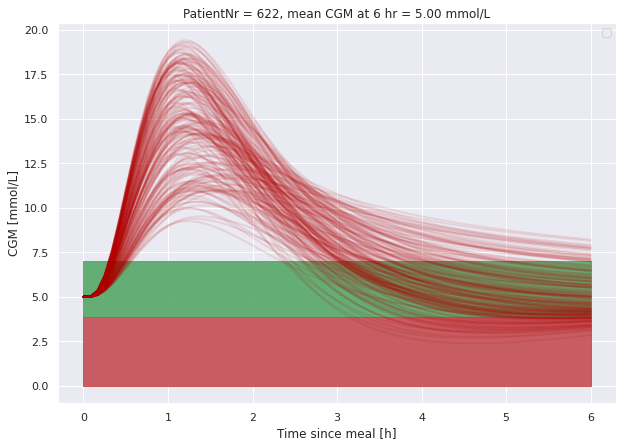

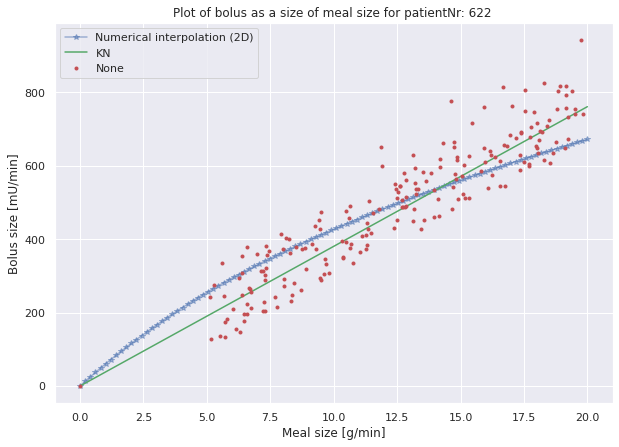

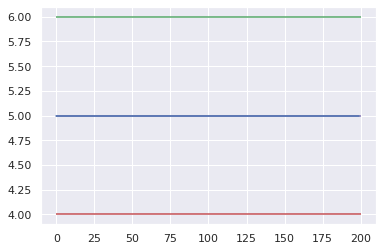

5.0 64.57638888888889 5.416666666666666


In [7]:
if simulation.jupyter:
    simulation.patient.set_u_opt()
    simulation.plot_CGM()
    simulation.make_u_opt_plot()

    plt.figure()
    plt.plot(simulation.nBG0)
    plt.hlines(6,0,200,'g')
    plt.hlines(5,0,200,'m')
    plt.hlines(4,0,200,'r')
    plt.show()

    print(simulation.nBG0.mean(),simulation.nTIR.mean(), simulation.nTBR.mean())
    

In [9]:
simulation.X_sample

array([[  0.        ,   0.        ],
       [537.57876285,  13.23220256],
       [411.67625869,  11.25533007],
       [472.20163431,  11.53992353],
       [521.92205799,  13.26196854],
       [740.01075717,  19.50544759],
       [231.07750097,   8.32989757],
       [709.22255488,  18.39290227],
       [156.19137769,   6.14462434],
       [668.99739054,  18.10144104],
       [129.25607953,   5.15561231],
       [612.69498737,  16.56980965],
       [241.80794885,   7.70404533],
       [382.061227  ,   7.31244264],
       [814.87162487,  16.66553616],
       [488.13202179,  12.70915016],
       [678.70535723,  17.73226546],
       [247.76164264,   8.34936619],
       [453.34867115,   9.41997504],
       [650.73965341,  14.75561363],
       [195.23279009,   6.46300403],
       [580.98469021,  13.82196202],
       [174.91806938,   5.73087321],
       [404.15440936,   8.12690806],
       [581.44020545,  12.75946826],
       [804.27866603,  19.40025955],
       [636.03659365,  18.05186205],
 